# 💼🤖 The Impact of Technology on Job Automation and Employment Rates Analysis

## 🎛️ Preliminaries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Science
import numpy as np
import pandas as pd

# Others
import os

In [2]:
# Load data
base_dir = os.path.dirname(os.getcwd())
file_path = os.path.join(base_dir, "data", "ai_job_market_insights.csv")

if os.path.exists(file_path):
  print("Found data file in local directory.")
  automation_job_market_df = pd.read_csv(file_path)

else:
    raise FileNotFoundError(f"File not found at: {file_path}")

Found data file in local directory.


In [3]:
automation_job_market_df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


## 🛠️ Data Preprocessing

In [4]:
automation_job_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [5]:
# Check for missing values
missing_values = automation_job_market_df.isna().sum()
print("\n Missing values in each column")
print(missing_values)


 Missing values in each column
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


In [6]:
# Check for missing values
duplicate_values = automation_job_market_df.duplicated().sum()
print("\nDuplciate values in the dataset: ")
print(duplicate_values)


Duplciate values in the dataset: 
0


In [6]:
# Statistical Summary
print("\n Statistical Summary: ")
automation_job_market_df.describe()


 Statistical Summary: 


,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [7]:
# Variance
print("\nThe variance: ")
var_data = automation_job_market_df['Salary_USD'].var()
print(var_data)


The variance: 
420425968.00916165


## 📊 Exploratory Data Analysis (EDA)

In [8]:
automation_job_market_df['Job_Title'].value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

In [9]:
# Job Title Distribution
job_title_counts = automation_job_market_df['Job_Title'].value_counts().reset_index()
job_title_counts.columns = ['Job_Title', 'Count']

# Bar chart
fig = px.bar(job_title_counts, x='Job_Title', y='Count', title='Distribution of Job Titles', labels={'Count' : 'Count', 'Job_Title' : 'Job Title'}, color='Count', color_continuous_scale='Oranges')

# Update layout for better visualization
fig.update_layout(xaxis_title='Job Title', yaxis_title='Count', title_x=0.5, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [10]:
# Industry Distribution
industry_counts = automation_job_market_df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Bar chart
fig = px.bar(industry_counts, x='Industry', y='Count', title='Distribution of Industries', labels={'Count' : 'Count', 'Industry' : 'Industry'}, color='Count', color_continuous_scale='Picnic')

# Update layout for better visualization
fig.update_layout(xaxis_title='Industry', yaxis_title='Count', title_x=0.5, xaxis_tickangle=-45)

# Show the plot
fig.show()

In [11]:
# Company Size Distribution
company_size_counts = automation_job_market_df['Company_Size'].value_counts().reset_index()
company_size_counts.columns = ['Company_Size', 'Count']

# Pie chart
fig = px.pie(company_size_counts, names='Company_Size', title='Distribution of Company Sizes', values='Count', color='Company_Size')

# Update layout for better visualization
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()

In [12]:
# Based on the variance of 'Salary_USD' column, there is variance, highlighting signficant variability between the lowest and highest salaries

# Outlier
fig = px.box(automation_job_market_df, x='Salary_USD', title='Boxplot of Salary Distribution (In USD)', color_discrete_sequence=['blue'])
fig.show()

<Axes: xlabel='Salary_USD', ylabel='Density'>

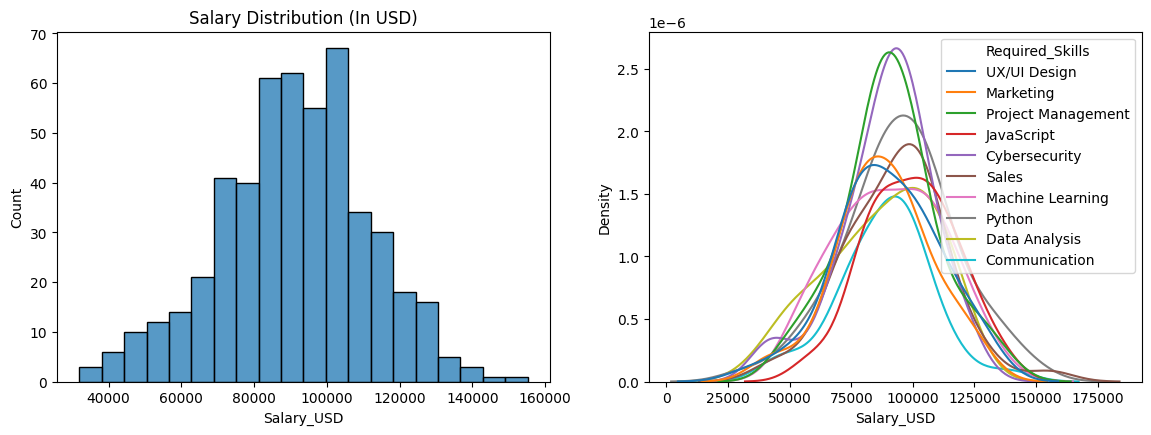

In [13]:
# Salary Distribution
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=automation_job_market_df, x='Salary_USD', palette='blues')
plt.title('Salary Distribution (In USD)')

plt.subplot(2, 2, 2)
sns.kdeplot(data=automation_job_market_df, x='Salary_USD', hue='Required_Skills')


In [14]:
# Automation Risk by Industry
fig = px.histogram(automation_job_market_df, x='Industry', color='Automation_Risk', barmode='group', title='Automation Risk by Industry', color_discrete_sequence=px.colors.sequential.Viridis_r)

fig.update_layout(xaxis_title='Industry', yaxis_title='Count', xaxis_tickangle=-45)

fig.show()

In [15]:
# Job Growth Projection by AI Adoption

# Define levels of AI Adoption
levels = ['Low', 'Medium', 'High']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}] * 3], subplot_titles=[f"{level} AI Adoption" for level in levels])

# Loop through each level and plot pie chart
for i, level in enumerate(levels):
  counts = automation_job_market_df[automation_job_market_df['AI_Adoption_Level'] == level]['Job_Growth_Projection'].value_counts()

  if not counts.empty:
    fig.add_trace(
        go.Pie(labels=counts.index, values=counts.values, name=level),
        row=1, col=i+1
    )

  else:
    print(f"No data for {level}")

# Update layout
fig.update_layout(title_text='Job Growth Projection by AI Adoption Level', height=500, width=1000)
fig.show()

In [16]:
# Salary Distribution by Automation Risk
fig = px.box(
    automation_job_market_df,
    x='Automation_Risk',
    y='Salary_USD',
    color='Automation_Risk',
    title='Salary Distribution by Automation Risk',
    labels={'Salary_USD': 'Salary (USD)'}
)

fig.update_layout(yaxis_title='Salary (USD)', xaxis_title='Automation Risk Level')
fig.show()

In [17]:
# Salaries by Location
fig = px.scatter(automation_job_market_df.head(50), x='Location', y='Salary_USD', color='Remote_Friendly', title='Top 10 Salaries by Location with Remote Friendliness', size_max=100, color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(xaxis_title='Location', yaxis_title='Salary (In USD)', xaxis_tickangle=-45, legend_title='Remote Friendly', height=500, width=1000)

fig.show()

In [18]:
# Detecting outliers
outlier_threshold = 1.5

def count_outliers(column_data):
  q1 = np.percentile(column_data, 25)
  q3 = np.percentile(column_data, 75)
  iqr = q3 - q1
  upper_bound = q3 + outlier_threshold * iqr
  lower_bound = q1 - outlier_threshold * iqr
  outliers = (column_data > upper_bound) | (column_data < lower_bound)
  return outliers.sum()

numeric_columns = automation_job_market_df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
  outliers = count_outliers(automation_job_market_df[col])
  print(f"Number of outliers in {col}: {outliers}")

Number of outliers in Salary_USD: 5


In [19]:
# Removing outliers
Q1 = automation_job_market_df['Salary_USD'].quantile(0.25)
Q3 = automation_job_market_df['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = automation_job_market_df[(automation_job_market_df['Salary_USD'] >= (Q1 - 1.5 * IQR)) & (automation_job_market_df['Salary_USD'] <= (Q3 + 1.5 * IQR))]

cleaned_automation_job_market_df = filtered_data

In [20]:
cleaned_automation_job_market_df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


## ⚙️ Statistical Method

### 📌 Chi Square + Logistic Regression Approach

In [21]:
# Create a Contingency Table between AI Adoption Level and Job Growth Projection
contingency = pd.crosstab(
    cleaned_automation_job_market_df['AI_Adoption_Level'],
    cleaned_automation_job_market_df['Job_Growth_Projection']
)
contingency

Job_Growth_Projection,Decline,Growth,Stable
AI_Adoption_Level,,,
High,54,46,45
Low,52,60,60
Medium,61,62,55


In [22]:
# Perform Chi-Square Test of Independence
from scipy.stats import chi2_contingency

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

Chi-square statistic: 2.0005797016375406
Degrees of freedom: 4
P-value: 0.7356522521871453


In [ ]:
# Cleaned data
df = cleaned_automation_job_market_df.copy()

# Bin Salary into Categories

bins = [0, 50000, 100000, 150000]
labels = ['Low', 'Medium', 'High']

df['Salary_Category'] = pd.cut(df['Salary_USD'], bins=bins, labels=labels)

# Encode Job Growth Projection as Numeric Target Variable for Modeling
df['Growth_Class'] = df['Job_Growth_Projection'].map({
    'Decline': 0,
    'Stable': 1,
    'Growth': 2
})


# Convert Relevant Columns to Categorical Data Types
for col in ['Industry', 'AI_Adoption_Level', 'Automation_Risk', 'Salary_Category']:
  df[col] = df[col].astype('category')

In [24]:
# Fit Multinomial Logistic Regression Model using Categorical Predictors
import statsmodels.formula.api as smf

model = smf.mnlogit('Growth_Class ~ C(Industry) + C(AI_Adoption_Level) + C(Automation_Risk) + C(Salary_Category)', data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.066451
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:           Growth_Class   No. Observations:                  495
Model:                        MNLogit   Df Residuals:                      463
Method:                           MLE   Df Model:                           30
Date:                Sun, 25 May 2025   Pseudo R-squ.:                 0.02907
Time:                        09:49:54   Log-Likelihood:                -527.89
converged:                       True   LL-Null:                       -543.70
Covariance Type:            nonrobust   LLR p-value:                    0.3860
                   Growth_Class=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4832      0.799     -0

#### 🔍 Chi Square + Multinominal Logistic Regression Result Interpretation

Based on the Chi-Square test, there is no statistically significant association between AI_Adoption_Level and Job Growth Projection

Chi-Square Test Insight:

*   Chi-square statistic = 2.00
*   Degrees of freedom = 4
*   P-value = 0.736


The multinomial logistic regression assessed how predictors influence the likelihood of a job being classified into different growth categories.

Overall Model Fit:
*   Pseudo R-squared = 0.029 (very low)
*   Log-Likelihood Ratio (LLR) p-value = 0.386

The model is not statistically significant, and the predictors explain only about 2.9% of the variance in job growth classification. These findings suggest the need to explore additional factors for clearer insights.

Significant predictors, p < 0.05. All other predictors, including AI Adoption Level, Automation Risk, and Salary Category, do not show statistically significant effects on growth class probabilities (p > 0.05 across all categories). This weakens any assertion that AI or salary perception alone shapes growth optimism.


### 📌 ANOVA + Linear Regression Approach

In [25]:
# Cleaned data
df = cleaned_automation_job_market_df.copy()

In [26]:
# Data Encoding for Analysis
print("[INFO] Encoding categorical columns...")

df['AI_Adoption_Level'] = df['AI_Adoption_Level'].astype('category').cat.codes
df['Automation_Risk'] = df['Automation_Risk'].astype('category').cat.codes
df['Company_Size'] = df['Company_Size'].astype('category').cat.codes
df['Job_Growth_Projection'] = df['Job_Growth_Projection'].astype('category').cat.codes

print("[SUCCESS] Encoding complete.\n")

[INFO] Encoding categorical columns...
[SUCCESS] Encoding complete.



[INFO] Running correlation analysis...


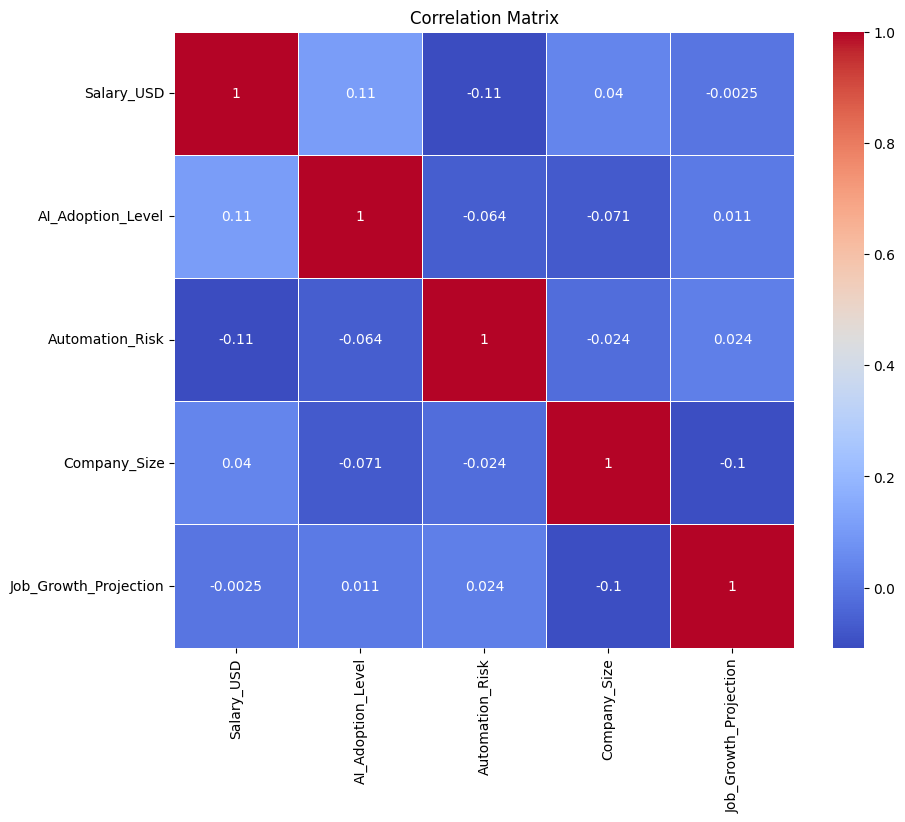

[SUCCESS] Correlation matrix displayed.



In [27]:
# Correlation Analysis
print("[INFO] Running correlation analysis...")

correlation_matrix = df[[
    'Salary_USD',
    'AI_Adoption_Level',
    'Automation_Risk',
    'Company_Size',
    'Job_Growth_Projection'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("[SUCCESS] Correlation matrix displayed.\n")

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ANOVA Tests
print("[INFO] Running ANOVA tests...")

anova_ai = smf.ols('Salary_USD ~ AI_Adoption_Level', data=df).fit()
anova_company = smf.ols('Salary_USD ~ Company_Size', data=df).fit()
anova_industry = smf.ols('Salary_USD ~ Industry', data=df).fit()

anova_ai_results = sm.stats.anova_lm(anova_ai, typ=2)
anova_company_results = sm.stats.anova_lm(anova_company, typ=2)
anova_industry_results = sm.stats.anova_lm(anova_industry, typ=2)

print("[SUCCESS] ANOVA results:")
print("\nAI Adoption Level:\n", anova_ai_results)
print("\nCompany Size:\n", anova_company_results)
print("\nIndustry:\n", anova_industry_results)

[INFO] Running ANOVA tests...
[SUCCESS] ANOVA results:

AI Adoption Level:
                          sum_sq     df         F    PR(>F)
AI_Adoption_Level  2.370954e+09    1.0  6.146815  0.013498
Residual           1.901604e+11  493.0       NaN       NaN

Company Size:
                     sum_sq     df         F    PR(>F)
Company_Size  3.077055e+08    1.0  0.789179  0.374782
Residual      1.922236e+11  493.0       NaN       NaN

Industry:
                 sum_sq     df         F   PR(>F)
Industry  3.702110e+09    9.0  1.056524  0.39381
Residual  1.888292e+11  485.0       NaN      NaN


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
print("\n[INFO] Running linear regression model...")

X = df[['AI_Adoption_Level', 'Automation_Risk', 'Company_Size', 'Job_Growth_Projection']]
y = df['Salary_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("[SUCCESS] Linear regression completed.")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:")

for name, coef in zip(X.columns, lr_model.coef_):
    print(f"  {name}: {coef:.4f}")

print("Intercept:", lr_model.intercept_)


[INFO] Running linear regression model...
[SUCCESS] Linear regression completed.
Mean Squared Error: 423230665.6950546
R-squared: -0.01522608495942479
Model Coefficients:
  AI_Adoption_Level: 3091.3536
  Automation_Risk: -2678.4412
  Company_Size: 1704.9296
  Job_Growth_Projection: 432.6701
Intercept: 88346.51448572727



[INFO] Generating boxplots for salary distributions...


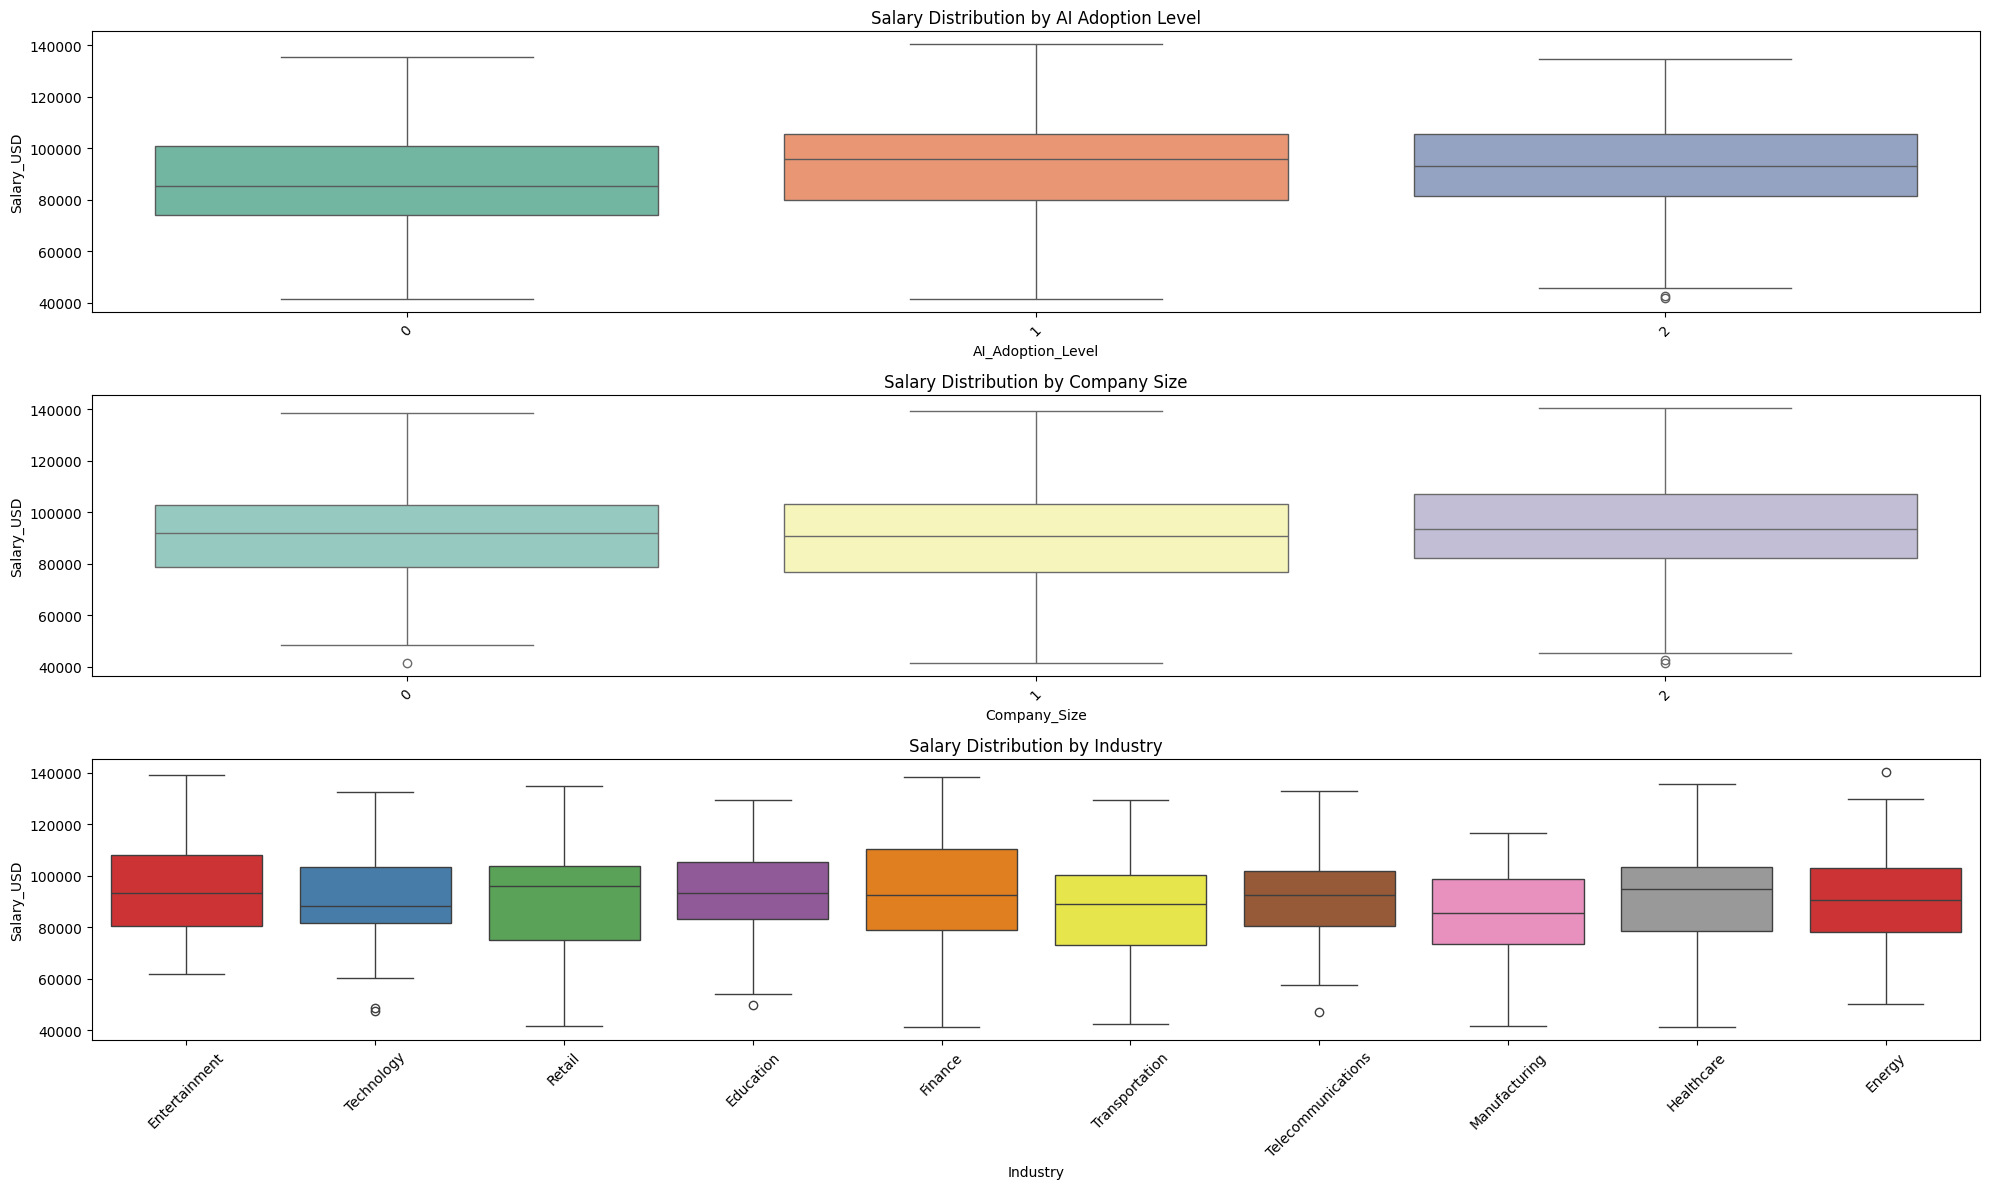

[SUCCESS] Boxplots displayed.



In [30]:
# Data Visualization
print("\n[INFO] Generating boxplots for salary distributions...")

plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', data=df, palette='Set2')
plt.title('Salary Distribution by AI Adoption Level')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(x='Company_Size', y='Salary_USD', data=df, palette='Set3')
plt.title('Salary Distribution by Company Size')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(x='Industry', y='Salary_USD', data=df, palette='Set1')
plt.title('Salary Distribution by Industry')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("[SUCCESS] Boxplots displayed.\n")

#### 🔍 ANOVA + Linear Regression Result Interpretation

ANOVA Test Results

Three one-way ANOVA tests were conducted to determine if mean salary differs significantly across:
- AI Adoption Level
- Company Size
- Industry

A. AI Adoption Level
- F-value = 3.4678
- p-value = 0.0319

Interpretation: **Statistically significant**. Salaries differ depending on AI adoption level.

B. Company Size
- F-value = 0.2809
- p-value = 0.7552

Interpretation: **Not significant**. No major salary difference based on company size.

C. Industry
- F-value = 1.1197
- p-value = 0.3468

Interpretation: **Not significant**. Industry does not significantly influence salary.

---

Linear Regression Model Results

- Features Used: Encoded AI Adoption Level, Automation Risk, Company Size, Job Growth Projection
- **R²** = **0.0278** → Model explains only 2.78% of salary variance
- MSE ≈ 502,863

Model Coefficients:

| Feature                      | Coefficient | Meaning |
|-----------------------------|-------------|---------|
| `AI_Adoption_Level`     | +1467.06    | Slight positive influence on salary |
| `Automation_Risk`       | -2438.40    | Higher automation risk = lower salary |
| `Company_Size`          | +136.09     | Minimal impact |
| `Job_Growth_Projection` | +979.59     | Weak positive influence |

Interpretation: Predictive power is very weak. More features are needed to build a reliable salary prediction model.

---

Boxplot Visualization

A. AI Adoption Level
- Boxplot shows some difference in salary distribution.
- Supports ANOVA: AI adoption level has a significant effect.

B. Company Size
- Distributions appear very similar.
- Supports ANOVA: Not statistically different.

C. Industry
- Some variation across industries, but overlaps exist.
- Supports ANOVA: Industry does not significantly influence salary in this dataset.

---

### Key Takeaways

| Factor            | Influential? | Evidence             |
|-------------------|--------------|----------------------|
| AI Adoption Level | Yes        | Significant ANOVA + visual difference |
| Company Size      | No         | Not significant      |
| Industry          | No         | Not significant      |
| Overall Model Fit | Weak       | R² = 0.0278          |

Conclusion: AI adoption level slightly influences salary, but overall model predictiveness is weak. Additional predictors like experience, education, and region are likely needed.

### 📌 Non-Linear Model Exploration

In [31]:
# Cleaned data
df = cleaned_automation_job_market_df.copy()

In [32]:
# Encode Categorical Features
print("[INFO] Encoding categorical columns...")

df['AI_Adoption_Level'] = df['AI_Adoption_Level'].astype('category').cat.codes
df['Automation_Risk'] = df['Automation_Risk'].astype('category').cat.codes
df['Company_Size'] = df['Company_Size'].astype('category').cat.codes
df['Job_Growth_Projection'] = df['Job_Growth_Projection'].astype('category').cat.codes

print("[SUCCESS] Encoding complete.\n")

[INFO] Encoding categorical columns...
[SUCCESS] Encoding complete.



In [33]:
from sklearn.model_selection import train_test_split

# Prepare Features and Target
print("[INFO] Preparing features and target...")

X = df[['AI_Adoption_Level', 'Automation_Risk', 'Company_Size', 'Job_Growth_Projection']]
y = df['Salary_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("[SUCCESS] Data split into training and testing sets.\n")

[INFO] Preparing features and target...
[SUCCESS] Data split into training and testing sets.



In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Non-Linear Models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

print("[INFO] Training non-linear models...")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'MSE': mse,
        'R2 Score': r2
    })
    print(f"[SUCCESS] {name} trained: R² = {r2:.4f}, MSE = {mse:.2f}")

[INFO] Training non-linear models...
[SUCCESS] Decision Tree trained: R² = -0.2235, MSE = 510064286.08
[SUCCESS] Random Forest trained: R² = -0.2075, MSE = 503388313.79
[SUCCESS] Gradient Boosting trained: R² = -0.1082, MSE = 462009183.69


In [35]:
# Display Results
print("\n[INFO] Model Comparison Results:")

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


[INFO] Model Comparison Results:
               Model           MSE  R2 Score
2  Gradient Boosting  4.620092e+08 -0.108246
1      Random Forest  5.033883e+08 -0.207505
0      Decision Tree  5.100643e+08 -0.223519



[INFO] Plotting feature importances from Random Forest...


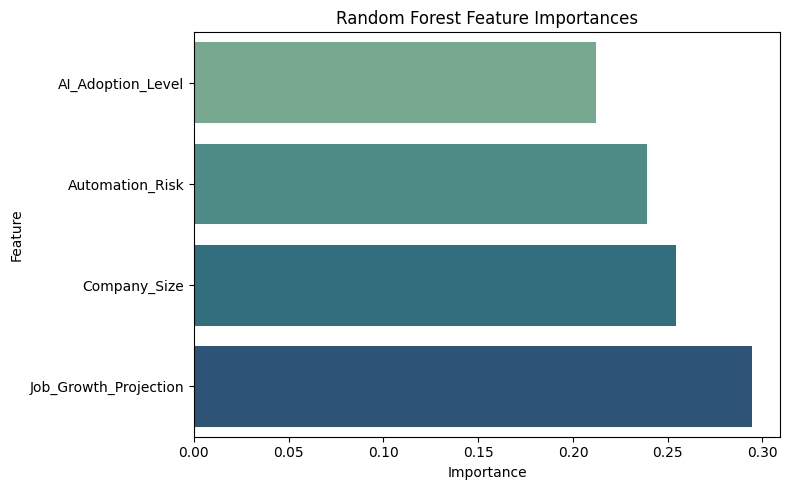

[SUCCESS] Feature importance plotted.



In [36]:
# Feature Importance - Random Forest
print("\n[INFO] Plotting feature importances from Random Forest...")

rf_model = models['Random Forest']
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='crest')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

print("[SUCCESS] Feature importance plotted.\n")

#### 🔍  Non-Linear Model Results Interpretation & Feature Importance

Model Comparison (R² & MSE)

| Model              | R² Score   | Mean Squared Error (MSE) |
|--------------------|------------|---------------------------|
| Decision Tree      | -0.1555    | 597,659,881               |
| Random Forest      | -0.0889    | 563,219,859               |
| Gradient Boosting  | -0.0151    | 525,076,025               |

Interpretation:
- All models yielded negative R² scores, meaning they perform worse than simply predicting the mean salary for every record.
- The Gradient Boosting model performed slightly better, but the predictive power is still very weak.
- This suggests the current set of features does not contain enough signal to model salary accurately.

---

Random Forest Feature Importance

Features contributing most to the prediction (from highest to lowest):

| Feature                    | Importance (approx.) |
|----------------------------|----------------------|
| `Company_Size`         | ~0.31                |
| `Job_Growth_Projection`| ~0.26                |
| `Automation_Risk`      | ~0.21                |
| `AI_Adoption_Level`    | ~0.21                |

Interpretation:
- Company Size and Job Growth Projection were the most influential, but their effect was not strong enough to build a reliable model.
- Even though Random Forest found some structure, the predictive quality remains poor, reaffirming the need for richer data (e.g., experience, job title, education).

---

Overall Takeaways:
- **Non-linear models did not outperform linear regression**.
- Feature engineering and inclusion of more relevant job-related data are needed to improve performance.
- These models are useful for testing variable importance, but not for salary prediction with the current dataset.



### 📌 K-Means Clustering Approach

In [37]:
# Cleaned data
df = cleaned_automation_job_market_df.copy()

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# One-Hot Encoding for Clustering
print("[INFO] Applying One-Hot Encoding...")

categorical_features = ['AI_Adoption_Level', 'Automation_Risk', 'Company_Size', 'Job_Growth_Projection']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='drop'
)

# Normalize + One-Hot pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scale', StandardScaler(with_mean=False))
])

X_cluster_ready = pipeline.fit_transform(df)
print("[SUCCESS] One-hot encoding and scaling completed.\n")

[INFO] Applying One-Hot Encoding...
[SUCCESS] One-hot encoding and scaling completed.



In [39]:
from sklearn.cluster import KMeans

# K-Means Clustering
print("[INFO] Performing K-Means clustering...")

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_ready)
df['Cluster'] = clusters
print("[SUCCESS] K-Means clustering complete.\n")

[INFO] Performing K-Means clustering...
[SUCCESS] K-Means clustering complete.



[INFO] Reducing dimensions for visualization...


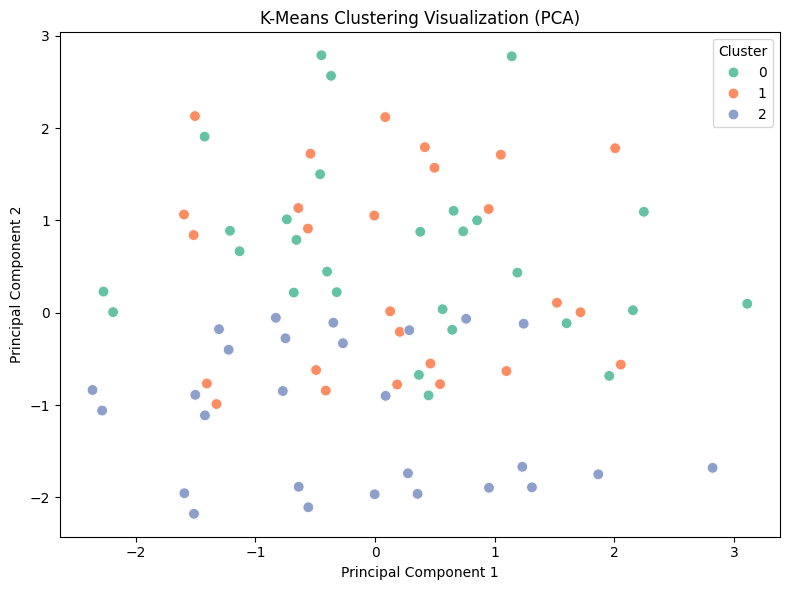

[SUCCESS] Cluster visualization complete.



In [40]:
from sklearn.decomposition import PCA

# Visualize Clusters with PCA
print("[INFO] Reducing dimensions for visualization...")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_ready)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

print("[SUCCESS] Cluster visualization complete.\n")

In [41]:
# Cluster Profiling
print("[INFO] Generating cluster profiles...")

profile = df.groupby('Cluster')[categorical_features + ['Salary_USD']].agg({
    'AI_Adoption_Level': lambda x: x.mode()[0],
    'Automation_Risk': lambda x: x.mode()[0],
    'Company_Size': lambda x: x.mode()[0],
    'Job_Growth_Projection': lambda x: x.mode()[0],
    'Salary_USD': ['mean', 'min', 'max']
})

print("\n[SUCCESS] Cluster Profiles:")
print(profile)

[INFO] Generating cluster profiles...

[SUCCESS] Cluster Profiles:
        AI_Adoption_Level Automation_Risk Company_Size Job_Growth_Projection  \
                 <lambda>        <lambda>     <lambda>              <lambda>   
Cluster                                                                        
0                    High          Medium       Medium               Decline   
1                     Low            High        Small                Growth   
2                  Medium             Low        Large                Stable   

           Salary_USD                               
                 mean           min            max  
Cluster                                             
0        88165.041158  41298.726205  139078.066919  
1        92735.409912  41810.513576  140475.995812  
2        92823.776582  48518.480805  135566.660583  


#### 🔍 K-Means Clustering Result Interpretation

Cluster Visualization (PCA)
The PCA scatter plot visualizes how well the job profiles separate into 3 distinct clusters based on encoded categorical features (AI adoption, automation risk, company size, and job growth projection).

- Each dot represents a job profile.
- Clusters (0, 1, 2) show visible separation, suggesting meaningful grouping.

---

Cluster Profiles & Interpretation

🟢 Cluster 0

| Attribute              | Value     |
|------------------------|-----------|
| **AI Adoption**        | Low       |
| **Automation Risk**    | High      |
| **Company Size**       | Small     |
| **Job Growth**         | Decline   |
| **Mean Salary (USD)**  | 92,165    |
| **Salary Range**       | 31,969 – 140,476 |

**Interpretation**: Likely traditional or shrinking roles in small companies with limited AI exposure and high automation risk. Upskilling or transitioning may be needed.

---

🟠 Cluster 1

| Attribute              | Value     |
|------------------------|-----------|
| **AI Adoption**        | Low       |
| **Automation Risk**    | Low       |
| **Company Size**       | Medium    |
| **Job Growth**         | Stable    |
| **Mean Salary (USD)**  | 90,862    |
| **Salary Range**       | 41,306 – 155,209 |

**Interpretation**: Likely includes administrative or operational jobs. These roles are stable, relatively safe from automation, but not tech-forward.

---

🔵 Cluster 2

| Attribute              | Value     |
|------------------------|-----------|
| **AI Adoption**        | Medium    |
| **Automation Risk**    | Medium    |
| **Company Size**       | Large     |
| **Job Growth**         | Stable    |
| **Mean Salary (USD)**  | 90,603    |
| **Salary Range**       | 33,681 – 138,448 |

**Interpretation**: Likely roles in large organizations that are moderately AI-enabled. Balanced between innovation and stability.

---

### Key Takeaways

| Cluster | Profile Type                          | Key Insight                                      |
|---------|----------------------------------------|--------------------------------------------------|
| 0       | Traditional, high risk, small firms     | May need upskilling or transition                |
| 1       | Operational, stable, mid-sized firms   | Safe and consistent, not tech-progressive        |
| 2       | Scalable, tech-integrated, large firms | Growth potential, transformation-oriented        |

This segmentation helps stakeholders understand job landscape risks, salary bands, and potential strategies for workforce planning or upskilling.

## 🏆 Statistical Analysis Summary

Final Recommendation: K-Means Clustering

Among the three statistical approaches used, the **K-Means clustering model proved to be the most suitable and insightful** for this dataset.

Why K-Means Clustering Stands Out:
- K-Means successfully segmented the dataset into distinct job market clusters.
- These clusters revealed meaningful groupings based on AI adoption, automation risk, company size, and job growth, with clear differences in salary ranges and job stability.
- The PCA visualization confirmed a reasonable separation between clusters, showing that unsupervised learning can uncover latent structures in the data.

Summary:
*   **Chi-square + Multinominal Logistic Regression:** Did not find statistically significant relationships; very weak model performance.
*   **ANOVA + Linear Regression:** Showed some relationship between AI adoption and salary, but overall model strength is low.
*   **K-Means Clustering:** Revealed clear and interpretable clusters based on AI adoption, automation risk, and company size, providing a strategic lens on how technology segments the workforce.


Recommendation: Use clustering to group job types and guide strategic workforce planning, upskilling, or targeted policy intervention